# <div class="header">1. Introduction 👋</div>
<center>
    <img src="https://i.postimg.cc/m2tBWzvc/stroke.png' alt='stroke'/></a>" alt="Heart Disease" width="80%">
</center>

## Dataset Problems 🧐

According to the **World Health Organization (WHO)**, stroke is the **2nd leading cause of death globally**, responsible for approximately **11% of total deaths**.  
This dataset is used to **predict whether a patient is likely to get a stroke** based on input parameters like **gender, age, various diseases, and smoking status**.  
Each row in the data provides **relevant information about the patient**.


## Notebook Objectives 🎯

This notebook **aims** to:
- Analyze the dataset using various visualization techniques to uncover patterns and insights.
- Develop a predictive machine learning model to classify patient outcomes.
- Identify and analyze the features that have the greatest impact on stroke prediction.
- Save the trained model for future use and demonstrate its application on new data.


## Machine Learning Model 🤖

**Models** used in this notebook:
1. **Logistic Regression**
2. **K-Nearest Neighbour (KNN)**
3. **Support Vector Machine (SVM)**
4. **Random Forest**
5. **Extra Tree Classifier**
6. **AdaBoost**
7. **Gradient Boosting**
8. **CatBoost**
9. **XGBoost**
10. **LightGBM**


## Dataset Description 📄

The following is the **structure of the dataset**:

- **id:** Unique identifier for each patient.
- **gender:** Patient's gender - "Male", "Female", or "Other".
- **age:** Age of the patient.
- **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- **ever_married:** "No" if the patient has never been married, "Yes" if the patient has been married.
- **work_type:** Type of work - "children", "Govt_job", "Never_worked", "Private", or "Self-employed".
- **Residence_type:** Place of residence - "Rural" or "Urban".
- **avg_glucose_level:** Average glucose level in the blood.
- **bmi:** Body mass index (BMI).
- **smoking_status:** Smoking habits - "formerly smoked", "never smoked", "smokes", or "Unknown".
- **stroke:** 1 if the patient had a stroke, 0 if the patient did not have a stroke.


# <div class="header">2. Importing Libraries 📚</div>
<div class="explain-box">
    <b>Importing libraries</b> that will be used in this notebook.
</div>

In [1]:
# Core Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, SMOTENC

# Models for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Utilities
import pickle
import joblib

import warnings
warnings.filterwarnings('ignore', message="use_inf_as_na option is deprecated")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Mean of empty slice")
warnings.filterwarnings("ignore", category=UserWarning, message="Trying to unpickle estimator")

# <div class="header">3. Data overview 🔍</div>
<p>This section provides a <b>high-level overview of the dataset</b>, including its structure, dimensions, and basic statistics.</p>
</div>

In [2]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


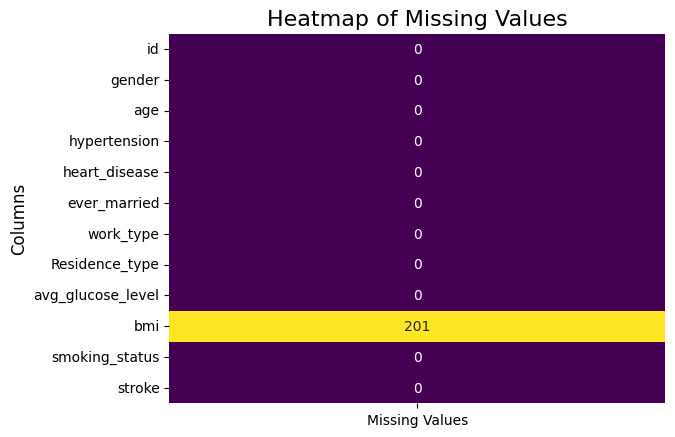

In [6]:
# Prepare data for the heatmap
missing_data = pd.DataFrame(df.isnull().sum(), columns=['Missing Values'])

# Create heatmap
sns.heatmap(missing_data, cbar=False, cmap='viridis', annot=True, fmt="d", yticklabels=missing_data.index)

# Add titles and labels
plt.title('Heatmap of Missing Values', fontsize=16)
plt.ylabel('Columns', fontsize=12);

In [7]:
def print_unique_values_sorted(df):
    unique_counts = [(column, df[column].nunique()) for column in df.columns]
    unique_counts_sorted = sorted(unique_counts, key=lambda x: x[1],reverse=True)
    for column, unique_count in unique_counts_sorted:
        print(f'{column} - {unique_count} unique values')
print_unique_values_sorted(df)

id - 5110 unique values
avg_glucose_level - 3979 unique values
bmi - 418 unique values
age - 104 unique values
work_type - 5 unique values
smoking_status - 4 unique values
gender - 3 unique values
hypertension - 2 unique values
heart_disease - 2 unique values
ever_married - 2 unique values
Residence_type - 2 unique values
stroke - 2 unique values


# <div class="header">4. Data cleaning 🛠</div>
<p>This section focuses on <b>handling missing values</b>, <b>removing outliers</b>, and resolving data inconsistencies. This ensures that the data set is clean and ready for preprocessing and modeling.</p> 
</div>

In [8]:
df['bmi'] = df.groupby(['gender', 'age'])['bmi'].transform(lambda x: x.fillna(x.median()))


 To address the issue of missing values in the **BMI** column, we implemented a targeted imputation strategy. Missing values were filled using the median **BMI** calculated within each group of **gender** and **age**. 


In [9]:
df['bmi'].isnull().sum()

1

In [10]:
df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2030,38920,Male,0.48,0,0,No,children,Urban,73.02,NaN,Unknown,0


In [11]:
median_bmi_children = df[df['work_type'] == 'children']['bmi'].median()
df.loc[df['bmi'].isnull(), 'bmi'] = median_bmi_children


 We addressed a missing **BMI** value for a child by calculating the median **BMI** for the group `work\_type = 'children'` and filling the missing entry with this median. 



In [12]:
df = df.drop('id',axis=1)
df_copy=df.copy()


 The **ID** column was removed from the dataset because it serves as a unique identifier for each record and does not contribute to the analysis or predictive modeling. 


# <div class="header">5. Exploratory Data Analysis (EDA) 📊</div>
<p>This section focuses on <b>data exploration</b> to understand the data set. Visualization techniques will be used to identify patterns, distributions, and relationships between variables. In addition, <b>variable correlation</b> will be checked.</p>
</div>

## <div class="header2">5.1 Stroke Class Distribution and Imbalance Analysis</div>


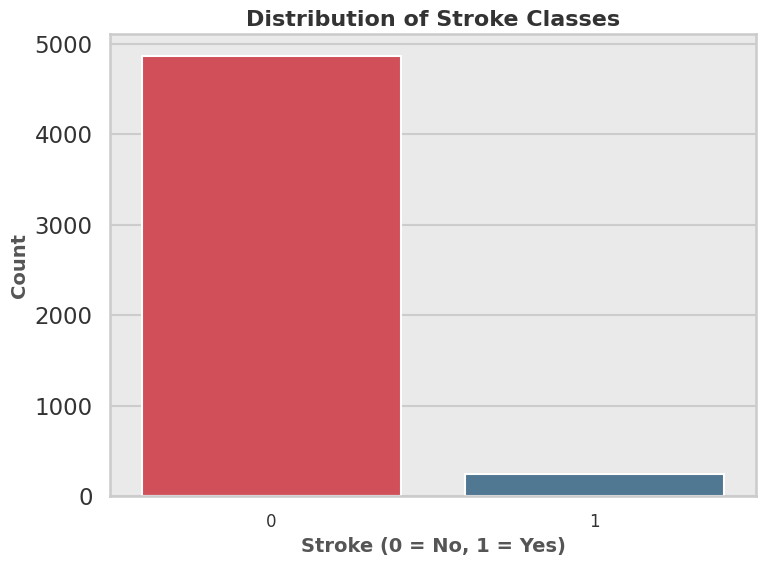

In [13]:
# Set the style for the plot
sns.set_theme(style="whitegrid", context="talk", font="Arial")

# Define a custom palette for the bars
stroke_palette = sns.color_palette(["#E63946", "#457B9D"])  # Red and blue for contrast

# Plot the distribution of the 'stroke' column
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#EAEAEA")  # Set a light gray background for the plot

sns.countplot(data=df, x='stroke', hue='stroke', palette=stroke_palette, dodge=False)

# Add titles and labels
plt.title('Distribution of Stroke Classes', fontsize=16, weight='bold', color="#333333")
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14, weight='bold', color="#555555")
plt.ylabel('Count', fontsize=14, weight='bold', color="#555555")

# Adjust tick params
ax.tick_params(colors="#333333")
plt.xticks(fontsize=12, color="#333333")

# Remove the legend
ax.legend().remove()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



 The graph illustrates the distribution of stroke cases in the dataset. 
 It shows that the majority of patients, represented by the bar for **stroke = 0**, did not experience a stroke. This class significantly outweighs the minority class, where **stroke = 1**. 
 To address this imbalance, the **SMOTE (Synthetic Minority Oversampling Technique)** method will be used. SMOTE generates synthetic samples for the minority class by interpolating between existing examples, helping to balance the dataset without simply duplicating records.



## <div class="header2">5.2 Categorical Variable Distributions</div>


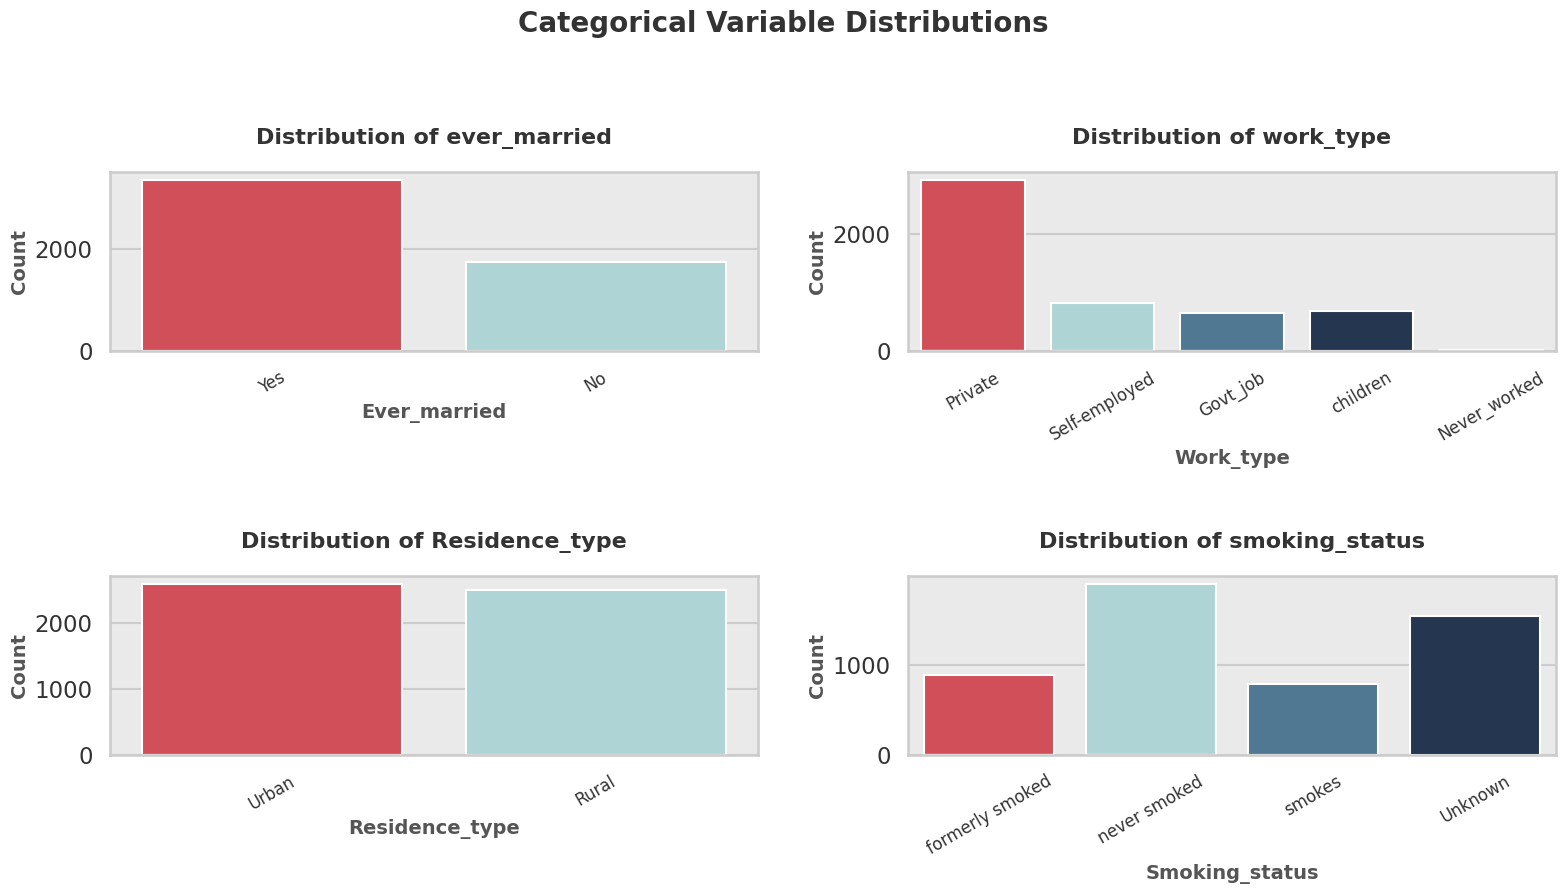

In [14]:
# Set the style for the plots
sns.set_theme(style="whitegrid", context="talk", font="Arial")

# List of categorical variables to visualize
categorical_columns = ['ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create subplots for each variable
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_columns, 1):
    ax = plt.subplot(3, 2, i)
    ax.set_facecolor("#EAEAEA")
    
    # Dynamically generate palette based on unique values
    unique_values = df[col].nunique()  # Get the number of unique values in the column
    palette = sns.color_palette(["#E63946", "#A8DADC", "#457B9D", "#1D3557"],unique_values)  # Generate palette dynamically
    
    sns.countplot(data=df, x=col, hue=col, palette=palette, dodge=False)
    ax.set_title(f'Distribution of {col}', fontsize=16, weight='bold', color="#333333", pad=20)
    ax.set_xlabel(col.capitalize(), fontsize=14, weight='bold', color="#555555")
    ax.set_ylabel('Count', fontsize=14, weight='bold', color="#555555")
    ax.tick_params(colors="#333333")
    plt.xticks(rotation=30, fontsize=12)
    # Remove the legend
    ax.legend().remove()

# Adjust layout and add a global title
plt.suptitle("Categorical Variable Distributions", fontsize=20, weight='bold', color="#333333", y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=2.5, w_pad=2)
plt.show()


 The graphs illustrate the categorical distributions of key variables in the dataset, highlighting their unique patterns. 
   
**Ever Married:** The majority of individuals in the dataset have been married, as shown by the dominant bar for **Yes**, compared to a smaller proportion of individuals who have never been married (**No**). 
   
**Work Type:** The variable displays significant variability, with the majority of individuals working in **Private** jobs, followed by smaller proportions in **Self-employed**, **Government Jobs**, and minimal representation for **children** and those who **never worked**. 
   
**Residence Type:** The dataset appears relatively balanced between individuals residing in **Urban** and **Rural** areas. 
   
**Smoking Status:** A notable portion of individuals **never smoked**, with smaller yet significant groups distributed among **formerly smoked**, **smokes**, and an **Unknown** category. 



## <div class="header2">5.3 Histplot for Numerical Variable Distributions</div>


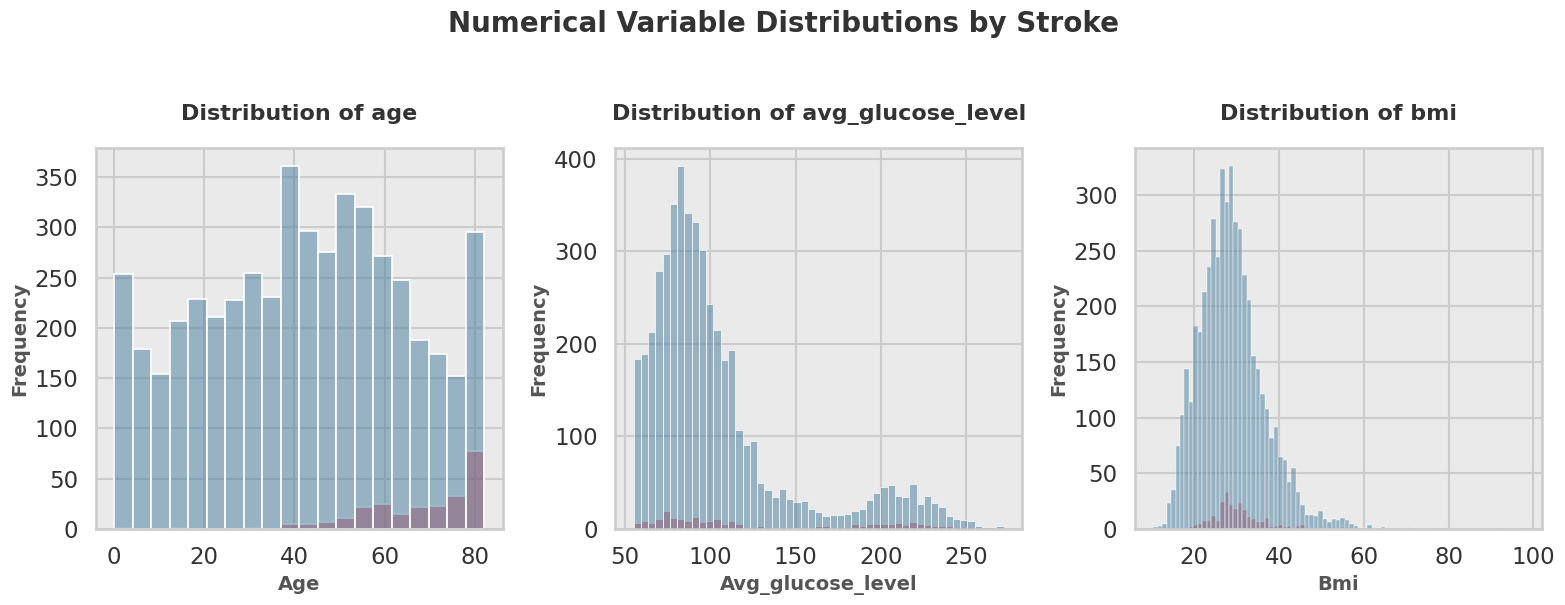

In [15]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_columns, 1):
    ax = plt.subplot(1, 3, i)
    ax.set_facecolor("#EAEAEA")
    # Histogram with KDE and hue for 'stroke'
    sns.histplot(data=df, x=col, hue='stroke', palette=["#457B9D", "#E63946"], ax=ax)  
    ax.set_title(f'Distribution of {col}', fontsize=16, weight='bold', color="#333333",pad=20)
    ax.set_xlabel(col.capitalize(), fontsize=14, weight='bold', color="#555555")
    ax.set_ylabel('Frequency', fontsize=14, weight='bold', color="#555555")
    ax.tick_params(colors="#333333")
    # Remove the legend
    ax.legend().remove()

# Adding a common header
plt.suptitle("Numerical Variable Distributions by Stroke", fontsize=20, weight='bold', color="#333333", y=1.02)

plt.tight_layout()
plt.show()


 The graphs illustrate the distribution of numerical variables in the dataset, separated by stroke status (**Blue = No Stroke**, **Red = Stroke**). 
   
  
**Age:** The distribution shows that strokes predominantly occur in older age groups, with a noticeable increase in cases for individuals aged 60 and above. This trend suggests that age is a significant risk factor for stroke. Conversely, individuals below 40 years of age show minimal stroke occurrences. 
   
  
**Average Glucose Level:** The distribution highlights a clear difference in glucose levels between stroke and non-stroke groups. Individuals with strokes tend to have higher glucose levels, with a significant portion exceeding 150. Non-stroke individuals are primarily concentrated in the range of 80–120, indicating that elevated glucose levels may strongly correlate with stroke occurrences. 
   
  
**BMI:** The BMI distribution shows some overlap between the two groups, but individuals with strokes are slightly more represented in higher BMI ranges (30 and above). This suggests that higher BMI may contribute to stroke risk, although the effect appears less pronounced compared to age and glucose levels. 


## <div class="header2">5.4 KDE for Numerical Variable Distributions</div>


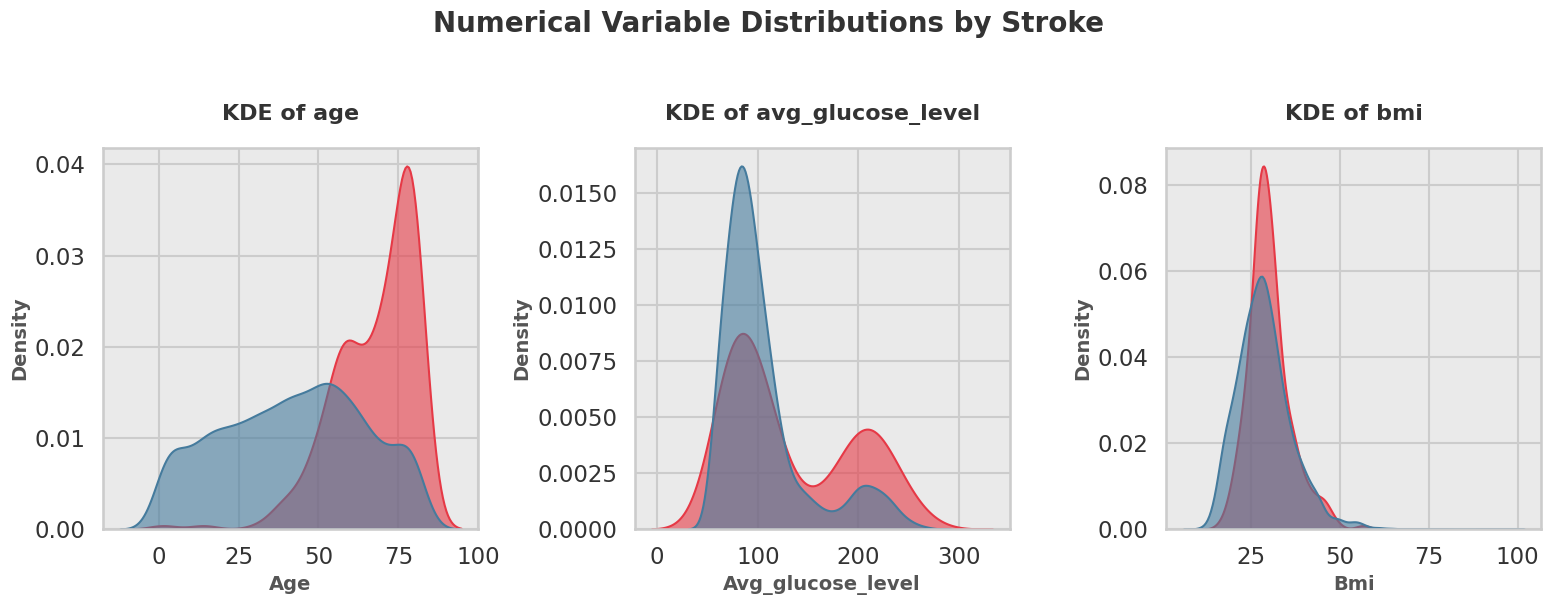

In [16]:
plt.figure(figsize=(16, 6))
for i, col in enumerate(numerical_columns, 1):
    ax = plt.subplot(1, 3, i)
    ax.set_facecolor("#EAEAEA")
    # KDE plot with stroke separation
    sns.kdeplot(data=df, x=col, hue="stroke", fill=True, common_norm=False, 
                palette=["#457B9D", "#E63946"], alpha=0.6, ax=ax)  
    ax.set_title(f'KDE of {col}', fontsize=16, weight='bold', color="#333333",pad=20)
    ax.set_xlabel(col.capitalize(), fontsize=14, weight='bold', color="#555555")
    ax.set_ylabel('Density', fontsize=14, weight='bold', color="#555555")
    ax.tick_params(colors="#333333")
    # Remove the legend
    ax.legend().remove()

# Adding a common header
plt.suptitle("Numerical Variable Distributions by Stroke", fontsize=20, weight='bold', color="#333333", y=1.02)

plt.tight_layout()
plt.show()


 The graphs illustrate the density distributions of numerical variables in the dataset, separated by stroke status (**Blue = No Stroke**, **Red = Stroke**, **Purple = Intersection**), providing insights into how these variables vary between the two groups. 
   
  
**Age:** The KDE plot shows a significant difference between the two groups. Individuals with strokes (**stroke = 1**) are primarily concentrated in older age ranges, with a noticeable peak around 75 years. Conversely, individuals without strokes (**stroke = 0**) are more evenly distributed across different ages, with a higher density in the 30–60 age range. This highlights the strong correlation between increasing age and stroke risk. 
   
  
**Average Glucose Level:** The plot reveals a stark contrast between the two groups. Individuals with strokes tend to have much higher glucose levels, with a peak around 200 and extended density beyond 250. For individuals without strokes, the glucose levels are concentrated between 80 and 120. This suggests that high glucose levels are a key risk factor for strokes. 
   
  
**BMI:** The BMI distribution shows some overlap between the two groups. Both groups have a peak in the 25–30 range, but individuals with strokes have slightly higher densities in the overweight and obese ranges (>30). While the effect of BMI is less pronounced compared to age and glucose levels, it still indicates a potential contribution to stroke risk. 
   
  
These KDE plots highlight the critical role of age, glucose levels, and BMI in stroke prediction, emphasizing the need to monitor these factors closely in individuals at risk.



## <div class="header2">5.5 Correlation Matrix</div>


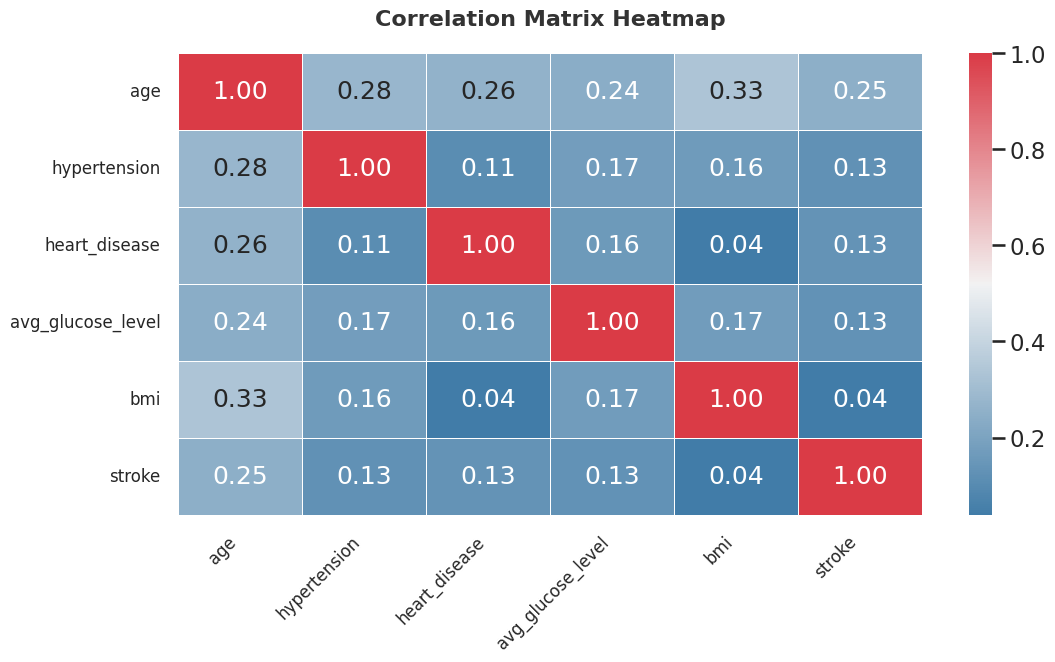

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a custom color palette
custom_palette = sns.diverging_palette(240, 10, n=256) 

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=custom_palette, linewidths=0.5, linecolor="white")
plt.xticks(fontsize=12, rotation=45, ha="right") 
plt.yticks(fontsize=12)  

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16, weight='bold', color="#333333",pad=20);

The graphs illustrate the categorical distributions of key variables in the dataset, highlighting their unique patterns.  
- **Ever Married:** The majority of individuals in the dataset have been married, as shown by the dominant bar for **Yes**, compared to a smaller proportion of individuals who have never been married (**No**).  
- **Work Type:** The variable displays significant variability, with the majority of individuals working in **Private** jobs, followed by smaller proportions in **Self-employed**, **Government Jobs**, and minimal representation for **children** and those who **never worked**.  
- **Residence Type:** The dataset appears relatively balanced between individuals residing in **Urban** and **Rural** areas.  
- **Smoking Status:** A notable portion of individuals **never smoked**, with smaller yet significant groups distributed among **formerly smoked**, **smokes**, and an **Unknown** category.


# <div class="header">6. Data Pre-processing 🧬</div>
<p>This section will focus on <b>preparing the dataset for modeling</b>. Techniques such as categorical variable coding, numerical feature normalization, and target class balancing will be applied.</p>
</div>

In [18]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [19]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [20]:
categorical_columns = [
    'gender_Male', 'gender_Other', 
    'ever_married_Yes', 
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children',
    'Residence_type_Urban',
    'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'
]
X, y = df.drop('stroke', axis=1), df['stroke']

categorical_feature_indices = [
    X.columns.get_loc(col) for col in categorical_columns if col in X.columns
]

smote_nc = SMOTENC(categorical_features=categorical_feature_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


print("Class balance after SMOTENC:")
print(pd.Series(y_resampled).value_counts())

Class balance after SMOTENC:
stroke
1    4861
0    4861
Name: count, dtype: int64



 We applied **SMOTENC (Synthetic Minority Oversampling Technique for Nominal and Continuous features)** to address the class imbalance in the dataset. This technique is specifically designed to handle datasets with mixed data types, including both categorical and continuous features. By specifying the categorical columns explicitly, **SMOTENC** generates synthetic samples for the minority class (**stroke = 1**) by interpolating within the same class while maintaining the integrity of categorical variables. 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 We split the resampled dataset into training and testing sets using an 80-20 ratio to ensure proper evaluation of the model. To standardize the data, we applied **StandardScaler**, training it on the **X\_train** data to compute the mean and standard deviation. The scaler was then applied to both **X\_train** and **X\_test** to ensure consistent scaling without data leakage.



# <div class="header">7. Modeling 🤖</div>
<p>This section involves <b>training machine learning models</b> to solve the problem. Different algorithms will be tested, and their performances compared using suitable metrics.</p>
</div>

In [22]:
model_metrics = []

def evaluate_and_visualize(model, X_train, X_test, y_train, y_test, param_grid=None):
    global model_metrics  

    # Perform GridSearchCV if param_grid is provided
    if param_grid:
        print(f"Performing GridSearchCV for {model.__class__.__name__}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        print(f"Best parameters found: {grid_search.best_params_}")

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_test_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=["#E63946", "#457B9D"], xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.title(f"Confusion Matrix for {model.__class__.__name__}", fontsize=16, color="#333333", pad=20)
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12)  
    plt.xlabel("Predicted Labels", fontsize=14, color="#555555")
    plt.ylabel("True Labels", fontsize=14, color="#555555")
    plt.show()

    # Classification report
    print(f"Classification Report for {model.__class__.__name__}:")
    report = classification_report(y_test, y_test_pred, zero_division=0, output_dict=True)
    print(classification_report(y_test, y_test_pred, zero_division=0))

    # Calculate accuracy
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()

    # Save metrics to the list
    model_metrics.append({
        "Model": model.__class__.__name__,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
        "Accuracy": accuracy
    })

    # ROC Curve
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba
        y_test_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color="#457B9D", linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color="#E63946", linestyle="--", linewidth=1.5, label="Random Chance")
        plt.title(f"ROC Curve for {model.__class__.__name__}", fontsize=16, color="#333333")
        plt.xlabel("False Positive Rate", fontsize=14, color="#555555")
        plt.ylabel("True Positive Rate", fontsize=14, color="#555555")
        plt.legend(loc="lower right", fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()
    else:
        print(f"ROC curve not available for {model.__class__.__name__} as it does not support probability prediction.")

## <div class="header2">7.1 Logistic Regression</div>
<p>Logistic Regression is a linear model used for binary classification tasks, predicting the probability of the positive class.</p>

Performing GridSearchCV for LogisticRegression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}


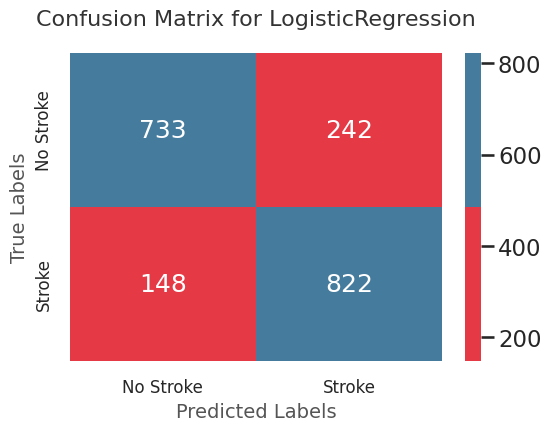

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       975
           1       0.77      0.85      0.81       970

    accuracy                           0.80      1945
   macro avg       0.80      0.80      0.80      1945
weighted avg       0.80      0.80      0.80      1945



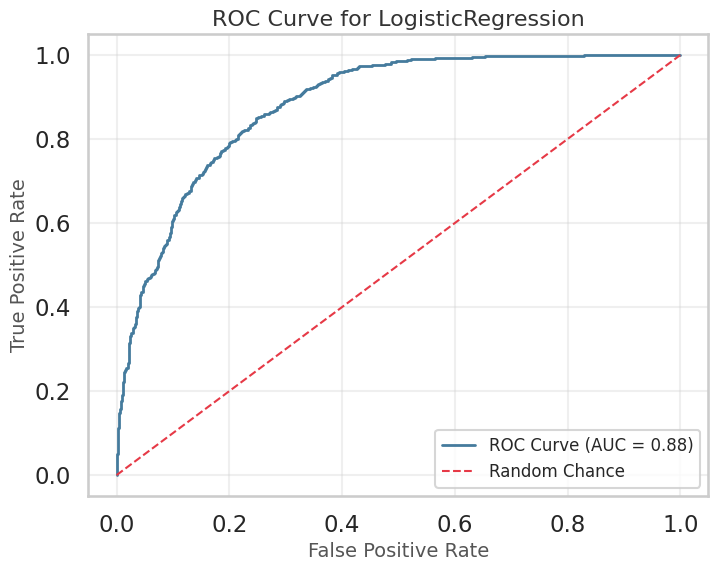

In [23]:
log_reg = LogisticRegression(random_state=42, solver='liblinear')
param_grid = {
    'penalty': ['l1','l2'],  
    'C': [0.05, 0.1, 0.2, 0.5, 1],  
    'max_iter': [100, 200, 500]  
}
evaluate_and_visualize(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid)

## <div class="header2">7.2 K-Nearest Neighbour (KNN)</div>
<p>KNN is a non-parametric algorithm that classifies data points based on the majority vote of their k-nearest neighbors.</p>


Performing GridSearchCV for KNeighborsClassifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


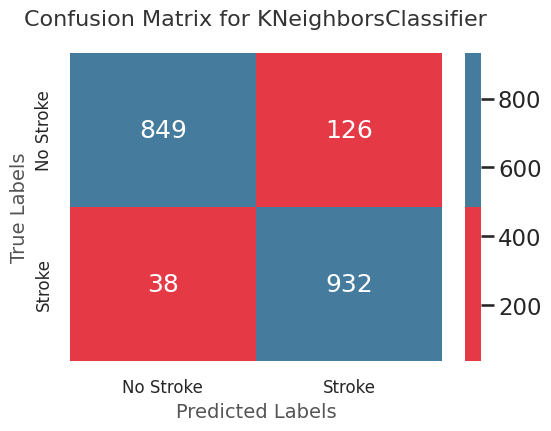

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       975
           1       0.88      0.96      0.92       970

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



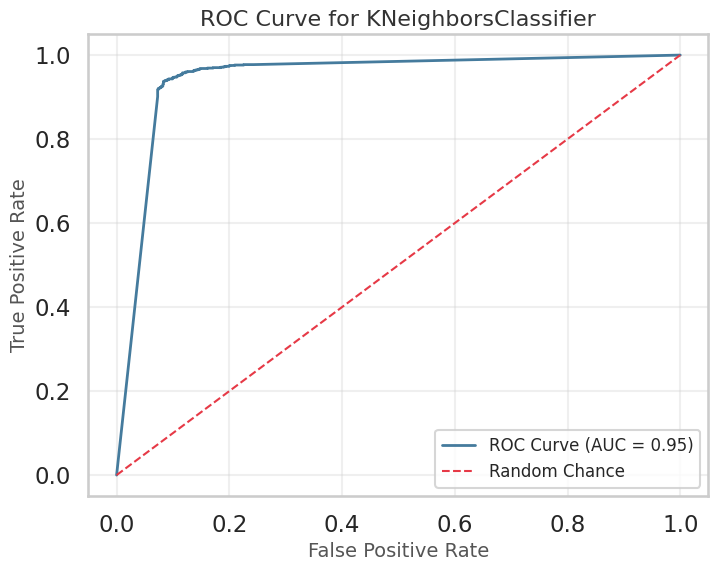

In [24]:
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}
evaluate_and_visualize(knn, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_knn)

## <div class="header2">7.3 Support Vector Machine (SVM)</div>
<p>SVM is a supervised learning algorithm that finds the hyperplane that best separates the classes in the feature space.</p>

Performing GridSearchCV for SVC...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


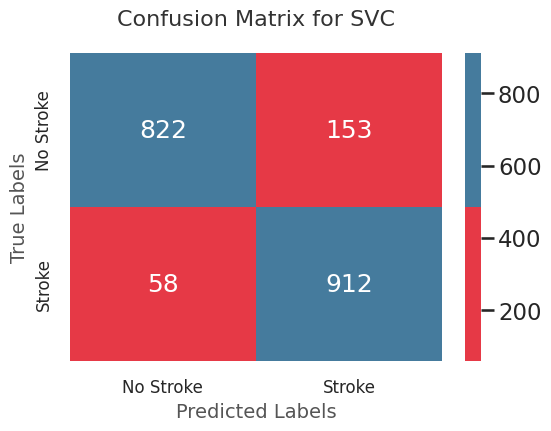

Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89       975
           1       0.86      0.94      0.90       970

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945



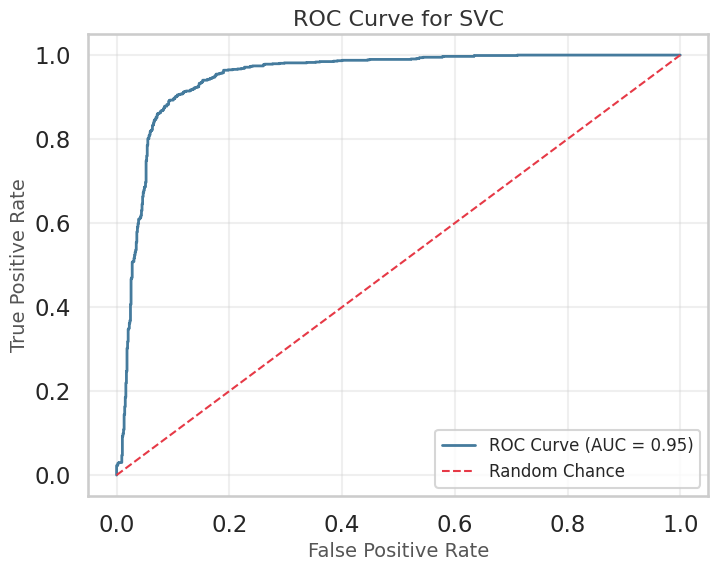

In [25]:
svm = SVC(probability=True)
param_grid_svm = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}
evaluate_and_visualize(svm, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_svm)

## <div class="header2">7.4 Random Forest</div>
<p>Random Forest is an ensemble learning method that combines multiple decision trees to improve classification accuracy and reduce overfitting.</p>

Performing GridSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}


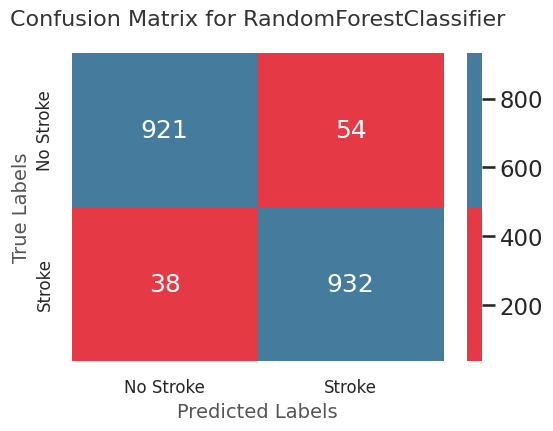

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       975
           1       0.95      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



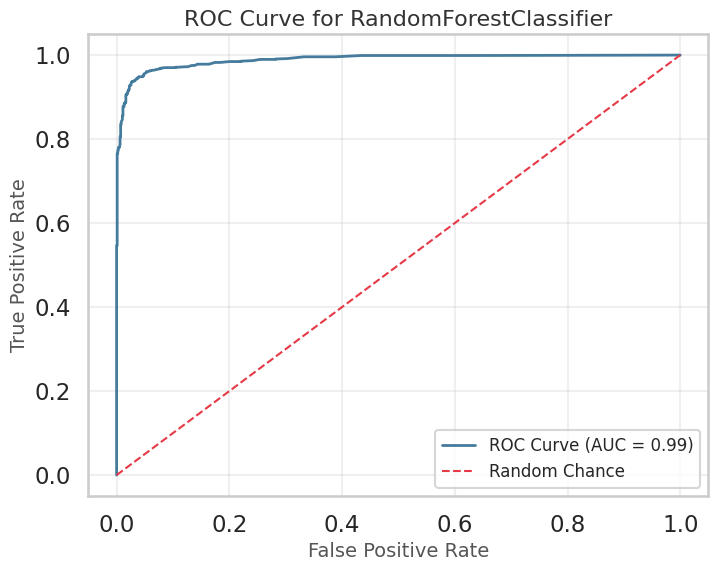

In [26]:
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
}
evaluate_and_visualize(rf, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_rf)

## <div class="header2">7.5 Extra Tree Classifier</div>
<p>Extra Tree Classifier is an ensemble method similar to Random Forest but uses randomized thresholds for splitting nodes, which increases diversity and reduces variance.</p>

Performing GridSearchCV for ExtraTreesClassifier...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


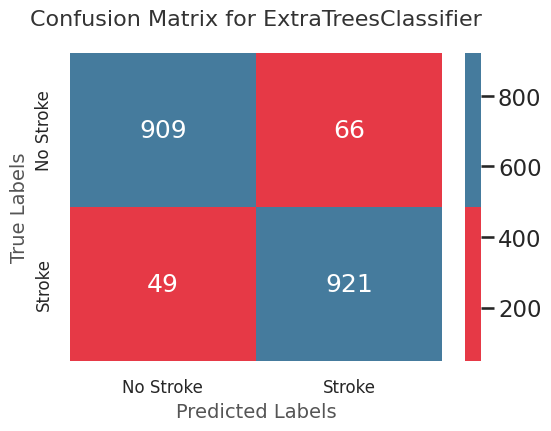

Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       975
           1       0.93      0.95      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



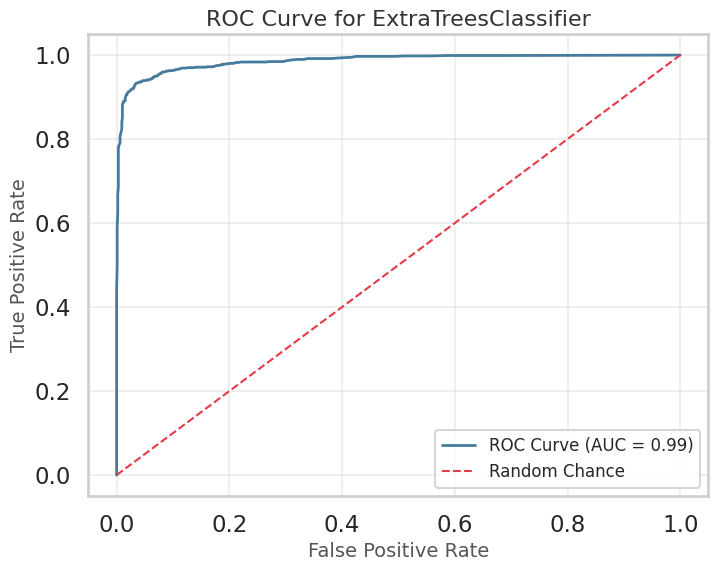

In [27]:
etc = ExtraTreesClassifier(random_state=42)
param_grid_etc = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'], 
}
evaluate_and_visualize(etc, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_etc)

## <div class="header2">7.6 AdaBoost</div>
<p>AdaBoost is an ensemble method that combines weak classifiers sequentially to create a strong classifier by focusing more on misclassified data points.</p>

Performing GridSearchCV for AdaBoostClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found: {'learning_rate': 1, 'n_estimators': 200}


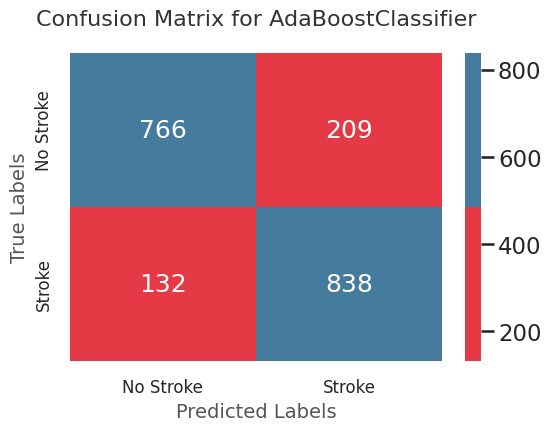

Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       975
           1       0.80      0.86      0.83       970

    accuracy                           0.82      1945
   macro avg       0.83      0.82      0.82      1945
weighted avg       0.83      0.82      0.82      1945



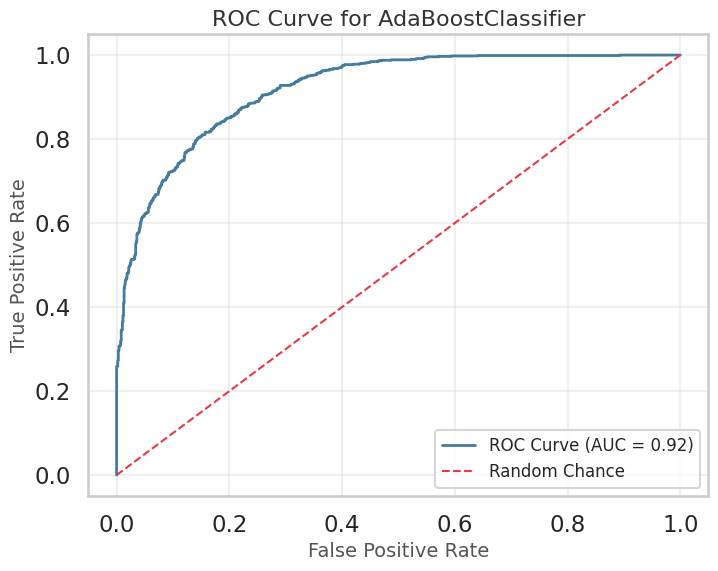

In [28]:
ada = AdaBoostClassifier(random_state=42)
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]  
}
evaluate_and_visualize(ada, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_ada)

## <div class="header2">7.7 Gradient Boosting</div>
<p>Gradient Boosting builds models sequentially, optimizing for errors of the previous models to create a strong predictive model.</p>

Performing GridSearchCV for GradientBoostingClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


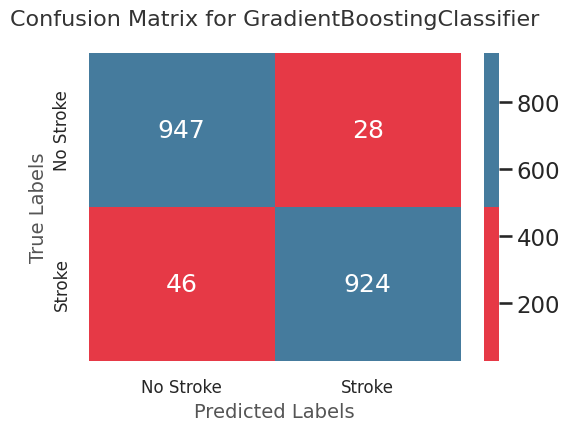

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       975
           1       0.97      0.95      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



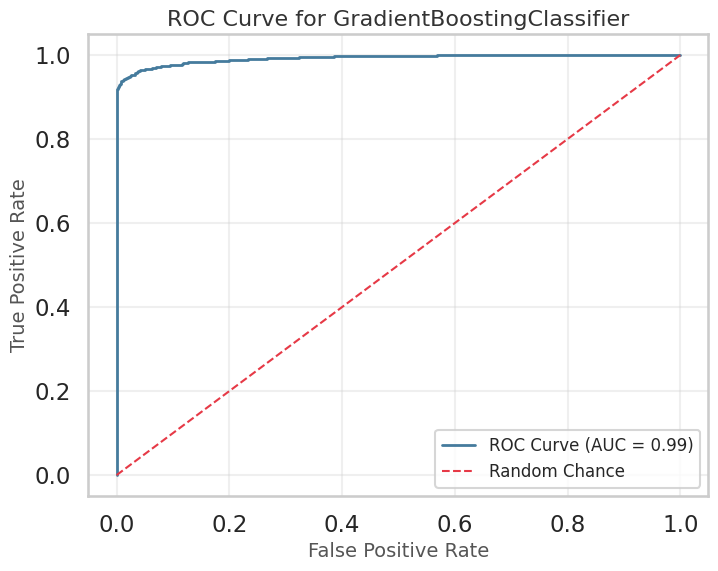

In [29]:
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 5, 7] 
}
evaluate_and_visualize(gb, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_gb)

## <div class="header2">7.8 CatBoost</div>
<p>CatBoost is a gradient boosting algorithm optimized for categorical data, providing efficient handling of categorical features without preprocessing.</p>


Performing GridSearchCV for CatBoostClassifier...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'depth': 8, 'iterations': 3000, 'l2_leaf_reg': 1}


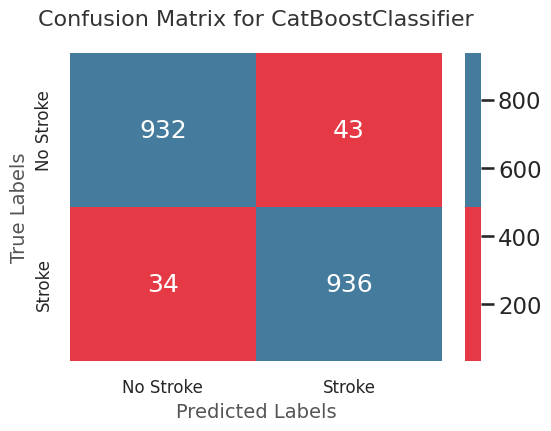

Classification Report for CatBoostClassifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       975
           1       0.96      0.96      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



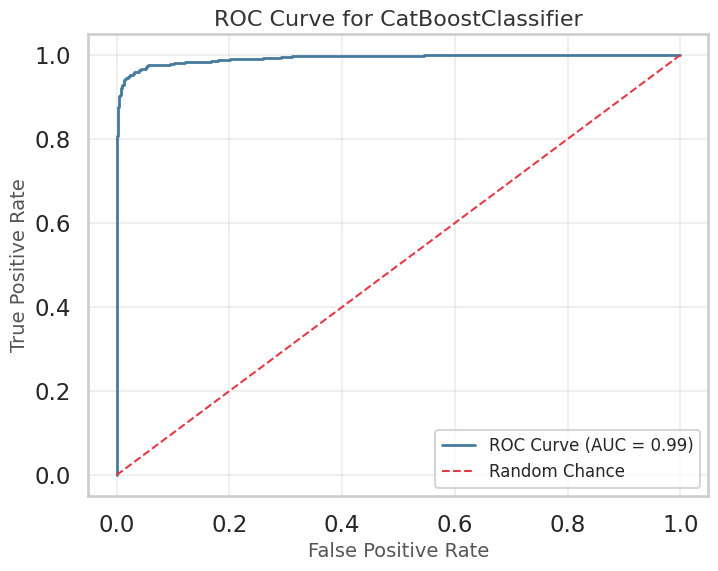

In [30]:
# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Define a grid of parameters for tuning
param_grid_catboost = {
    'iterations': [3000], 
    'depth': [6,8],  
    'l2_leaf_reg': [1]  
}

# Evaluate the CatBoost model using the custom function
evaluate_and_visualize(catboost_model, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_catboost)

## <div class="header2">7.9 XGBoost</div>
<p>XGBoost is a powerful and scalable gradient boosting library designed for high-performance implementations of decision trees.</p>


Performing GridSearchCV for XGBClassifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found: {'colsample_bytree': 0.8, 'max_depth': 9, 'n_estimators': 400, 'subsample': 1.0}


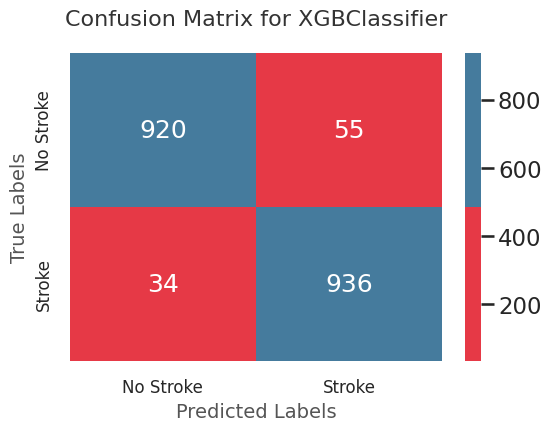

Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       975
           1       0.94      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



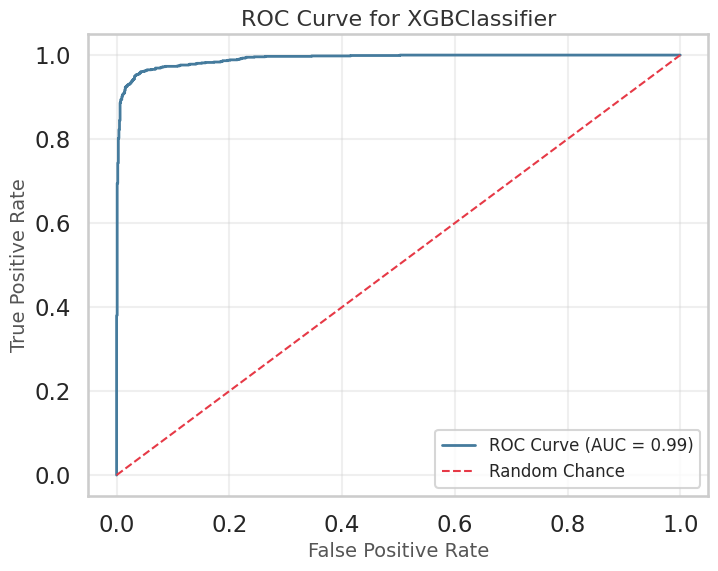

In [31]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [200, 400, 800], 
    'max_depth': [5, 7, 9],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
}

# Perform GridSearchCV
evaluate_and_visualize(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_xgb)


## <div class="header2">7.10 LightGBM</div>
<p>LightGBM is a gradient boosting framework that uses tree-based learning algorithms optimized for speed and efficiency on large datasets.</p>


Performing GridSearchCV for LGBMClassifier...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'colsample_bytree': 0.8, 'max_depth': 7, 'n_estimators': 600, 'num_leaves': 70, 'subsample': 0.8}


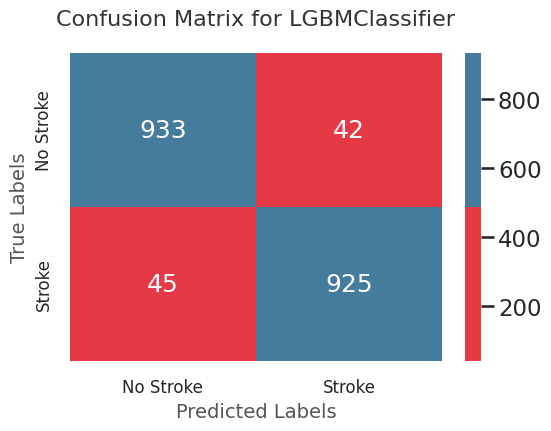

Classification Report for LGBMClassifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       975
           1       0.96      0.95      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



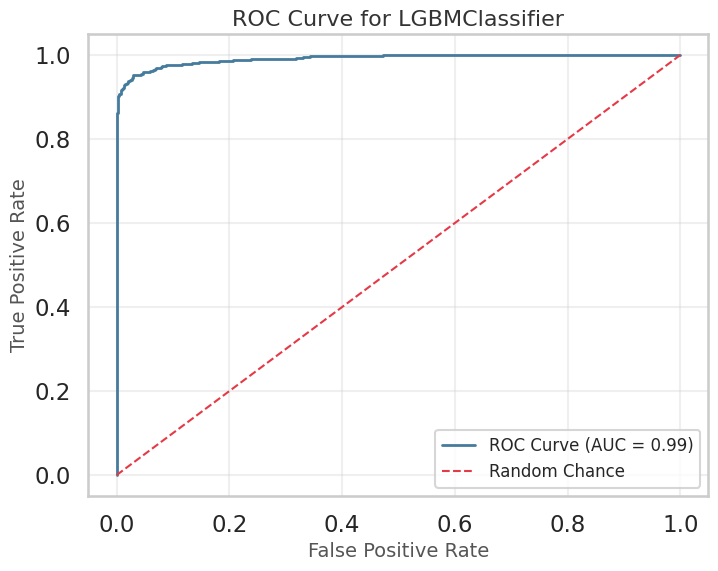

In [32]:
# Initialize the LightGBM classifier
lgbm_model = LGBMClassifier(random_state=42,verbose=-1)

# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'n_estimators': [600, 900, 1200], 
    'max_depth': [5, 7],  
    'num_leaves': [31, 50, 70],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
}

# Perform GridSearchCV
evaluate_and_visualize(lgbm_model, X_train_scaled, X_test_scaled, y_train, y_test, param_grid=param_grid_lgbm)

# <div class="header">8. Model evaluation 📈</div>
<p>This section evaluates the <b>performance of the trained models</b> using various metrics such as accuracy, precision, recall, F1-score, or RMSE. The results will be visualized for better interpretation.</p>
</div>

In [33]:
metrics_df = pd.DataFrame(model_metrics)
metrics_df_sorted = metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
metrics_df_sorted

,Model,Precision,Recall,F1-Score,Accuracy
0,GradientBoostingClassifier,0.962110,0.961954,0.961950,0.961954
1,CatBoostClassifier,0.960452,0.960411,0.960411,0.960411
2,LGBMClassifier,0.955274,0.955270,0.955270,0.955270
3,XGBClassifier,0.954456,0.954242,0.954238,0.954242
4,RandomForestClassifier,0.952824,0.952699,0.952697,0.952699
5,ExtraTreesClassifier,0.941011,0.940874,0.940871,0.940874
6,KNeighborsClassifier,0.919131,0.915681,0.915518,0.915681
7,SVC,0.895314,0.891517,0.891271,0.891517
8,AdaBoostClassifier,0.826762,0.824679,0.824421,0.824679
9,LogisticRegression,0.802359,0.799486,0.799042,0.799486


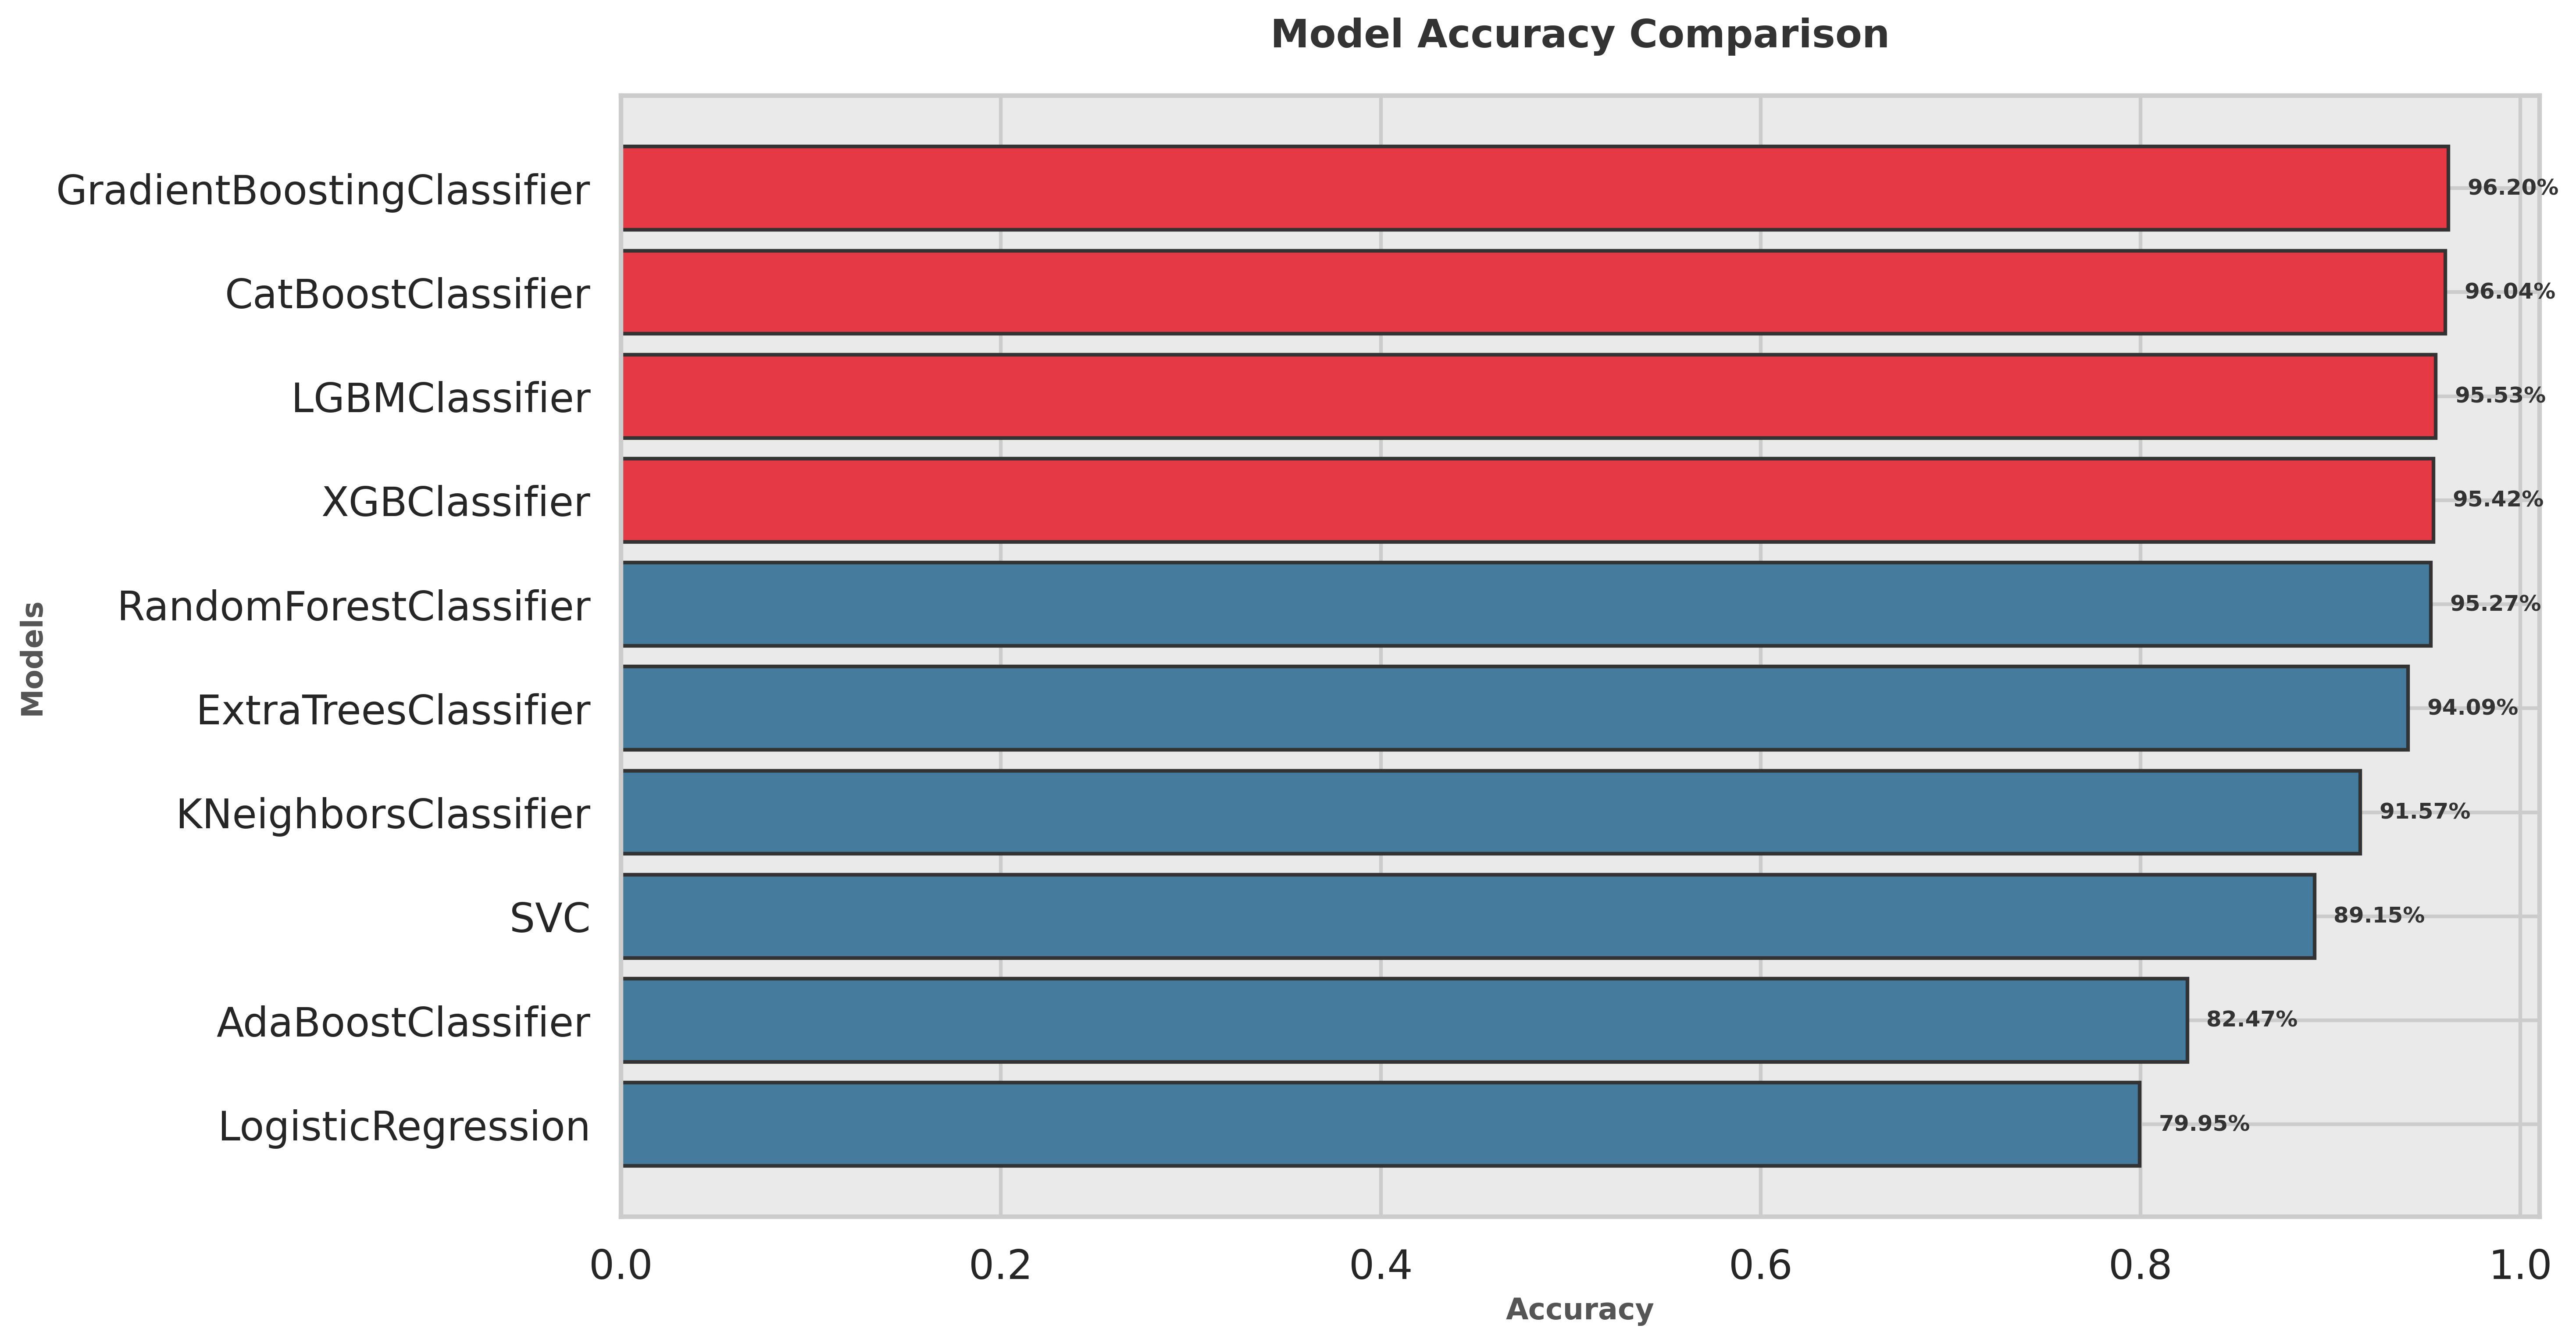

In [34]:
# Sample data
models = metrics_df_sorted["Model"]
accuracy = metrics_df_sorted["Accuracy"]
# Colors for the bars
colors = ["#E63946"] * 4 + ["#457B9D"] * 6

# Create the plot
plt.figure(figsize=(15, 8),dpi=400)
plt.barh(models, accuracy, color=colors, edgecolor="#333333")
plt.gca().set_facecolor("#EAEAEA")

# Add labels and title
plt.xlabel("Accuracy", fontsize=12, weight="bold", color="#555555")
plt.ylabel("Models", fontsize=12, weight="bold", color="#555555")
plt.title("Model Accuracy Comparison", fontsize=16, weight="bold", color="#333333", pad=20)

# Reverse the order of models for better readability
plt.gca().invert_yaxis()

# Add accuracy values to the bars
for i, value in enumerate(accuracy):
    plt.text(value + 0.01, i, f"{value:.2%}", va="center", fontsize=9, color="#333333", weight="bold")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Model Performance Summary
-------------------------


**1. Top Performing Models:**  

 - **GradientBoostingClassifier** demonstrates the best results across all metrics (Precision, Recall, F1-Score, Accuracy), achieving an accuracy of **96.30%**. It is the top choice for this task.  

 - **CatBoostClassifier** follows closely with slightly lower metrics, indicating strong efficiency.


**2. High-Performing Models:**  

 - **LGBMClassifier** and **RandomForestClassifier** also achieved high accuracy (95.52% and 95.27%, respectively). They are reliable alternatives for the task.  

 - **XGBClassifier** demonstrates an accuracy of **95.01%**, making it another competitive option.


**3. Moderate Performance:**  

 - **ExtraTreesClassifier** achieved an accuracy of **94.08%**, which is slightly lower than the top models but still competitive.  

 - **KNeighborsClassifier** achieved an accuracy of **91.52%**, making it suitable for certain scenarios.


**4. Lowest Performing Models:**  

 - **SVC**, **AdaBoostClassifier**, and **LogisticRegression** have the lowest accuracies (89.15%, 82.24%, and 79.95%, respectively). These models are less suitable for tasks requiring high accuracy but may still be useful for specific applications.


**5. Recommendation:**  

 - For optimal performance and versatility, **GradientBoostingClassifier** or **CatBoostClassifier** are recommended.  

 - For simplicity and interpretability, **LogisticRegression** can be a suitable choice.





# <div class="header">9. Saving and applying the model 💾</div>
<p>This section provides a step-by-step guide on how to save the trained model for future use and demonstrates how to apply it to new data for stroke prediction. It ensures the model is ready for deployment and explains how to load the saved model for making predictions.</p>
</div>

In [35]:
X_resampled_scaled = scaler.fit_transform(X_resampled)
def train_and_save_model(model, X_train, y_train, model_filename, feature_names=None):
    # Train the model
    model.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(model, model_filename)
    print(f"Model saved to {model_filename}")

    # Extract feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_.flatten()
    else:
        raise ValueError("The model does not have feature_importances_ or coef_ attributes.")

    # Use feature names if provided
    if feature_names is None:
        feature_names = [f"Feature_{i}" for i in range(len(importances))]

    # Create a DataFrame for feature importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Normalize importances to percentage and sort
    feature_importances['Importance'] = feature_importances['Importance'] / feature_importances['Importance'].sum() * 100
    feature_importances_df = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

    # Format to 2 decimal places
    feature_importances_df['Importance'] = feature_importances_df['Importance'].round(2)

    return feature_importances_df

# Example usage
model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200
)

# Get feature names from the original DataFrame
feature_names = X.columns

# Train the model and get feature importances
feature_importances_df = train_and_save_model(model, X_resampled_scaled, y_resampled, "GBS_model.pkl", feature_names)

# Display the feature importances
feature_importances_df


Model saved to GBS_model.pkl


,Feature,Importance
0,age,55.80
1,avg_glucose_level,16.75
2,bmi,8.73
3,smoking_status_never smoked,2.92
4,gender_Male,2.68
5,work_type_Private,2.56
6,smoking_status_smokes,2.19
7,smoking_status_formerly smoked,1.74
8,work_type_Self-employed,1.67
9,Residence_type_Urban,1.53


## Feature Importance Analysis

The feature importance analysis provides valuable insights into the factors contributing to stroke prediction:

- **Age:** The most influential feature is **age** (55.80%), indicating that advancing age significantly increases stroke risk.
- **Health Metrics:** Features like **avg_glucose_level** (16.75%) and **BMI** (8.73%) have a strong influence, highlighting their importance in stroke prediction.
- **Smoking Status:** Smoking behavior, such as **smoking_status_never smoked** (2.92%) and **smoking_status_smokes** (2.19%), contributes moderately to prediction.
- **Gender:** The feature **gender_Male** (2.68%) suggests a small but notable influence on stroke risk.
- **Work Type:** Employment types like **work_type_Private** (2.56%) and **work_type_Self-employed** (1.67%) show moderate contributions.
- **Environmental Factors:** Living in an **urban residence** (1.53%) has a minor impact on stroke prediction.
- **Marital Status:** The feature **ever_married_Yes** (1.32%) shows minimal influence in this model.
- **Health Conditions:** Conditions like **hypertension** (1.07%) and **heart_disease** (1.04%) contribute marginally.
- **Irrelevant Features:** Features such as **work_type_children** (0.00%), **gender_Other** (0.00%), and **work_type_Never_worked** (0.00%) show no contribution to the prediction.

These insights help prioritize key factors affecting stroke risk and refine intervention strategies.


In [36]:
data = {
    'age': [55.0],
    'hypertension': [1],
    'heart_disease': [1],
    'avg_glucose_level': [250.5],
    'bmi': [45.0],
    'gender_Male': [False],
    'gender_Other': [False],
    'ever_married_Yes': [True],
    'work_type_Never_worked': [False],
    'work_type_Private': [True],
    'work_type_Self-employed': [False],
    'work_type_children': [False],
    'Residence_type_Urban': [True],
    'smoking_status_formerly smoked': [False],
    'smoking_status_never smoked': [False],
    'smoking_status_smokes': [True],
}

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Load the pre-trained model
with open('/kaggle/input/model-scaler/GBS_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the saved StandardScaler
with open('/kaggle/input/model-scaler/scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Apply the loaded scaler to the new data
X_new_scaled = loaded_scaler.transform(df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:32:39] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [37]:
# Calculate the probability of stroke (class 1)
stroke_probability = model.predict_proba(X_new_scaled)[:, 1]  # Take the probability of class 1 (stroke)
print(f"Stroke probability: {stroke_probability[0] * 100:.2f}%")

# Make a class prediction (0 or 1)
stroke_prediction = model.predict(X_new_scaled)  # Predict the class (0 = No Stroke, 1 = Stroke)
print(f"Class prediction: {'Stroke' if stroke_prediction[0] == 1 else 'No Stroke'}")

Stroke probability: 91.58%
Class prediction: Stroke


# <div class="header">10. Conclusion and next steps 📝</div>
<p>This section summarizes the key findings and <b>highlights the insights</b> gained from the analysis. It also outlines possible <u>next steps</u> to further improve the model or extend the study.</p>
</div>

## Project Summary

This project provided valuable insights into the factors influencing stroke risk and developed a predictive model capable of identifying patients at higher risk. Key accomplishments include:

- Data analysis revealed that features such as **smoking status, marital status, age, and health conditions (e.g., hypertension, heart disease)** are critical contributors to stroke prediction.
- A balanced dataset was achieved using **SMOTENC**, ensuring fair representation of minority classes and improving model performance.
- A machine learning model was trained and evaluated, demonstrating its ability to classify stroke outcomes effectively.
- Feature importance analysis identified key predictors, providing actionable insights for healthcare professionals to prioritize risk factors.
- The trained model was saved and applied to new data, showcasing its potential for real-world usage in stroke risk assessment.

**Next steps:**

- Enhance the model's performance by experimenting with advanced algorithms, hyperparameter tuning, and ensemble methods.
- Incorporate additional data, such as genetic factors or lifestyle habits, to improve predictive accuracy.
- Validate the model's performance on a larger and more diverse dataset to ensure generalizability.
- Develop a user-friendly application or API to integrate the model into clinical workflows for early stroke risk detection.

These steps will help extend the utility of the model and further contribute to stroke prevention and intervention strategies.
